In [1]:
import pandas as pd
import seaborn as sns
from glob import glob
from datetime import datetime

In [2]:
dfs = []

for filename in sorted(glob("data/green500_top_*.xlsx")):
    print(f"reading {filename}")
    d = datetime.strptime(filename, "data/green500_top_%Y%m.xlsx")
    df1 = pd.read_excel(filename)
    df1 = df1.rename(columns={
        "How?": "Power Source",
        "how": "Power Source",
    })
    try:
        df1["Power Quality Level"] = df1["Power Quality Level"].where(lambda x: x != 0).dropna()
    except KeyError:
        pass
    df1["list"] = d
    dfs.append(df1)
df = pd.concat(dfs)

reading data/green500_top_201311.xlsx
reading data/green500_top_201406.xlsx
reading data/green500_top_201411.xlsx


/home/tilsche/.cache/pypoetry/virtualenvs/green500-analysis-WmafIKM_-py3.11/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


reading data/green500_top_201506.xlsx
reading data/green500_top_201511.xlsx
reading data/green500_top_201606.xlsx
reading data/green500_top_201611.xlsx
reading data/green500_top_201706.xlsx
reading data/green500_top_201711.xlsx
reading data/green500_top_201806.xlsx
reading data/green500_top_201811.xlsx
reading data/green500_top_201906.xlsx
reading data/green500_top_201911.xlsx
reading data/green500_top_202006.xlsx
reading data/green500_top_202011.xlsx
reading data/green500_top_202106.xlsx
reading data/green500_top_202111.xlsx
reading data/green500_top_202206.xlsx
reading data/green500_top_202211.xlsx
reading data/green500_top_202306.xlsx


In [13]:
for list, dfl in df.groupby("list"):
    print(list)
    print(dfl["Power Quality Level"].value_counts(dropna=False))
    print((dfl["Energy Efficiency [GFlops/Watts]"] > 0).value_counts())

2013-11-01 00:00:00
Power Quality Level
NaN    500
Name: count, dtype: int64
Energy Efficiency [GFlops/Watts]
False    500
Name: count, dtype: int64
2014-06-01 00:00:00
Power Quality Level
NaN    500
Name: count, dtype: int64
Energy Efficiency [GFlops/Watts]
False    500
Name: count, dtype: int64
2014-11-01 00:00:00
Power Quality Level
NaN    500
Name: count, dtype: int64
Energy Efficiency [GFlops/Watts]
False    500
Name: count, dtype: int64
2015-06-01 00:00:00
Power Quality Level
NaN    500
Name: count, dtype: int64
Energy Efficiency [GFlops/Watts]
False    500
Name: count, dtype: int64
2015-11-01 00:00:00
Power Quality Level
NaN    500
Name: count, dtype: int64
Energy Efficiency [GFlops/Watts]
False    500
Name: count, dtype: int64
2016-06-01 00:00:00
Power Quality Level
NaN    500
Name: count, dtype: int64
Energy Efficiency [GFlops/Watts]
False    500
Name: count, dtype: int64
2016-11-01 00:00:00
Power Quality Level
NaN    500
Name: count, dtype: int64
Energy Efficiency [GFlops/Wat

[Text(0, 0, '2017-06-01 00:00:00'), Text(1, 0, '2017-11-01 00:00:00'), Text(2, 0, '2018-06-01 00:00:00'), Text(3, 0, '2018-11-01 00:00:00'), Text(4, 0, '2019-06-01 00:00:00'), Text(5, 0, '2019-11-01 00:00:00'), Text(6, 0, '2020-06-01 00:00:00'), Text(7, 0, '2020-11-01 00:00:00'), Text(8, 0, '2021-06-01 00:00:00'), Text(9, 0, '2021-11-01 00:00:00'), Text(10, 0, '2022-06-01 00:00:00'), Text(11, 0, '2022-11-01 00:00:00'), Text(12, 0, '2023-06-01 00:00:00')]


[Text(0, 0, '17-06'),
 Text(1, 0, '17-11'),
 Text(2, 0, '18-06'),
 Text(3, 0, '18-11'),
 Text(4, 0, '19-06'),
 Text(5, 0, '19-11'),
 Text(6, 0, '20-06'),
 Text(7, 0, '20-11'),
 Text(8, 0, '21-06'),
 Text(9, 0, '21-11'),
 Text(10, 0, '22-06'),
 Text(11, 0, '22-11'),
 Text(12, 0, '23-06')]

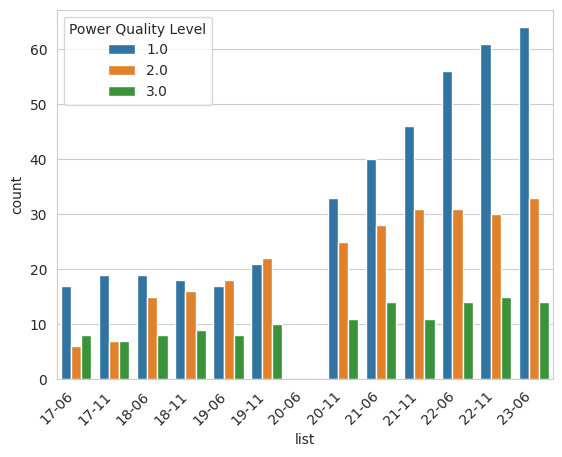

In [4]:
dff = df[df.list > datetime(year=2017, month=1, day=1)]
chart = sns.countplot(x="list", hue="Power Quality Level", data=dff)
print(chart.get_xticklabels())
x_dates = dff["list"].dt.strftime('%y-%m').unique()
chart.set_xticklabels(labels=x_dates, rotation=45, ha="right")

[Text(0, 0, '2017-06-01 00:00:00'), Text(1, 0, '2017-11-01 00:00:00'), Text(2, 0, '2018-06-01 00:00:00'), Text(3, 0, '2018-11-01 00:00:00'), Text(4, 0, '2019-06-01 00:00:00'), Text(5, 0, '2019-11-01 00:00:00'), Text(6, 0, '2020-06-01 00:00:00'), Text(7, 0, '2020-11-01 00:00:00'), Text(8, 0, '2021-06-01 00:00:00'), Text(9, 0, '2021-11-01 00:00:00'), Text(10, 0, '2022-06-01 00:00:00'), Text(11, 0, '2022-11-01 00:00:00')]


[Text(0, 0, '17-06'),
 Text(1, 0, '17-11'),
 Text(2, 0, '18-06'),
 Text(3, 0, '18-11'),
 Text(4, 0, '19-06'),
 Text(5, 0, '19-11'),
 Text(6, 0, '20-06'),
 Text(7, 0, '20-11'),
 Text(8, 0, '21-06'),
 Text(9, 0, '21-11'),
 Text(10, 0, '22-06'),
 Text(11, 0, '22-11')]

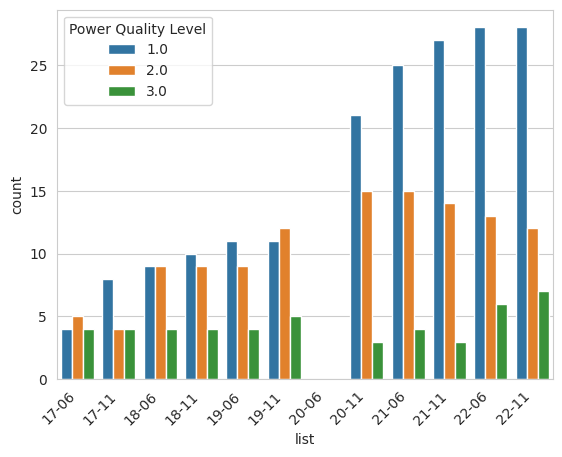

In [7]:
# Limit to top100 systems
df0 = df[df.list > datetime(year=2017, month=1, day=1)]
dff = df0[df0["TOP500 Rank"] <= 100]
chart = sns.countplot(x="list", hue="Power Quality Level", data=dff)
print(chart.get_xticklabels())
x_dates = dff["list"].dt.strftime('%y-%m').unique()
chart.set_xticklabels(labels=x_dates, rotation=45, ha="right")

<Axes: xlabel='Power Quality Level', ylabel='Rank'>

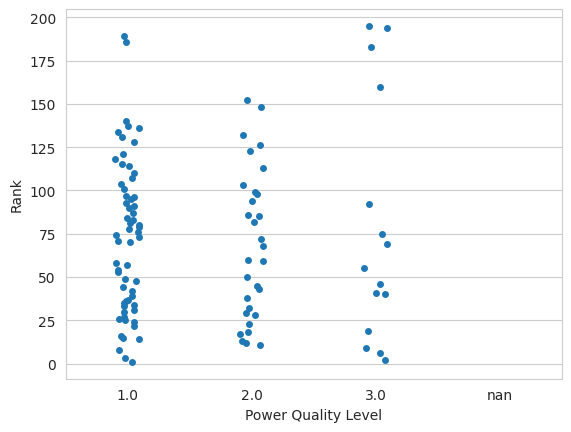

In [9]:
df0 = df[df.list == datetime(year=2022, month=11, day=1)]
sns.stripplot(x="Power Quality Level", y="Rank", data=df0)